In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [3]:
import pandas as pd


In [4]:
df = pd.DataFrame()

In [5]:
df['X'] = X.reshape(100)
df['y'] = y

In [6]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

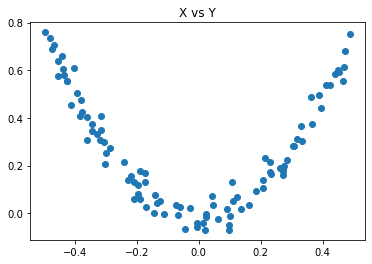

In [7]:

plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

In [8]:
df["pred1"]=df["y"].mean()

In [9]:
df.head()

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


In [10]:
df["res1"]=df["y"]-df["pred1"]

In [11]:
df.head()

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


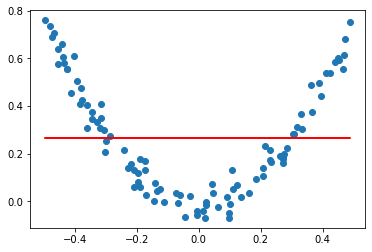

In [12]:
plt.scatter(df["X"],df["y"])
plt.plot(df["X"],df["pred1"],color="red")

In [21]:

from sklearn.tree import DecisionTreeRegressor

In [22]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [23]:
# tree1.fit(df["X"].values.reshape(100,1),df["res1"].values)
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)
     

DecisionTreeRegressor(max_leaf_nodes=8)

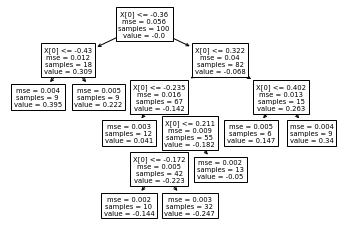

In [24]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [25]:
X_test=np.linspace(-.5,.5,500)

In [44]:
X_test

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397,
       -0.48997996, -0.48797595, -0.48597194, -0.48396794, -0.48196393,
       -0.47995992, -0.47795591, -0.4759519 , -0.4739479 , -0.47194389,
       -0.46993988, -0.46793587, -0.46593186, -0.46392786, -0.46192385,
       -0.45991984, -0.45791583, -0.45591182, -0.45390782, -0.45190381,
       -0.4498998 , -0.44789579, -0.44589178, -0.44388778, -0.44188377,
       -0.43987976, -0.43787575, -0.43587174, -0.43386774, -0.43186373,
       -0.42985972, -0.42785571, -0.4258517 , -0.4238477 , -0.42184369,
       -0.41983968, -0.41783567, -0.41583166, -0.41382766, -0.41182365,
       -0.40981964, -0.40781563, -0.40581162, -0.40380762, -0.40180361,
       -0.3997996 , -0.39779559, -0.39579158, -0.39378758, -0.39178357,
       -0.38977956, -0.38777555, -0.38577154, -0.38376754, -0.38176353,
       -0.37975952, -0.37775551, -0.3757515 , -0.37374749, -0.37174349,
       -0.36973948, -0.36773547, -0.36573146, -0.36372745, -0.36

In [34]:
y_pred=0.265458+tree1.predict(X_test.reshape(500,1))

In [35]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


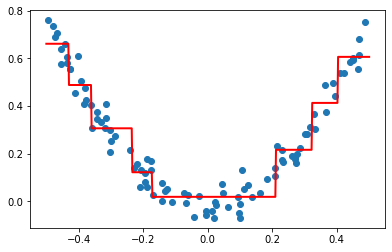

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [39]:
df["pred2"]=265458+tree1.predict(df["X"].values.reshape(100,1))

In [40]:
df

,X,y,pred1,res1,pred,pred2
0,-0.125460,0.051573,0.265458,-0.213885,265457.752861,265457.752861
1,0.450714,0.594480,0.265458,0.329021,265458.340426,265458.340426
2,0.231994,0.166052,0.265458,-0.099407,265457.950326,265457.950326
3,0.098658,-0.070178,0.265458,-0.335636,265457.752861,265457.752861
4,-0.343981,0.343986,0.265458,0.078528,265458.040506,265458.040506
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,265457.752861,265457.752861
96,0.022733,-0.002305,0.265458,-0.267763,265457.752861,265457.752861
97,-0.072459,0.032809,0.265458,-0.232650,265457.752861,265457.752861
98,-0.474581,0.689516,0.265458,0.424057,265458.395454,265458.395454


In [42]:
df["res2"]=df["y"]-df["pred2"]

In [43]:
df.head()

,X,y,pred1,res1,pred,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,265457.752861,265457.752861,-265457.701288
1,0.450714,0.594480,0.265458,0.329021,265458.340426,265458.340426,-265457.745946
2,0.231994,0.166052,0.265458,-0.099407,265457.950326,265457.950326,-265457.784274
3,0.098658,-0.070178,0.265458,-0.335636,265457.752861,265457.752861,-265457.823039
4,-0.343981,0.343986,0.265458,0.078528,265458.040506,265458.040506,-265457.696520


In [45]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [46]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [48]:
y_pred=.265458+sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

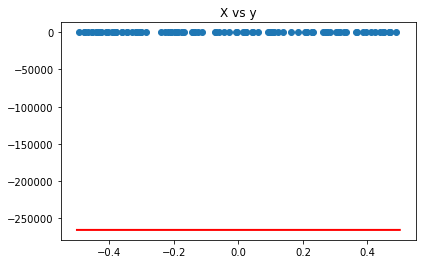

In [49]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color="red")
plt.scatter(df["X"],df["y"])
plt.title("X vs y")

In [50]:

def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

     

5


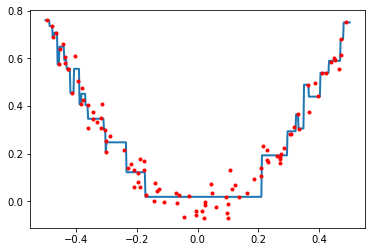

4


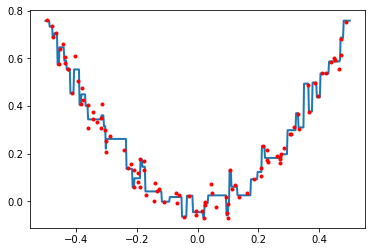

3


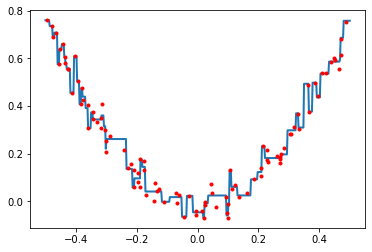

2


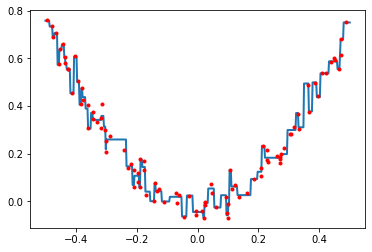

1


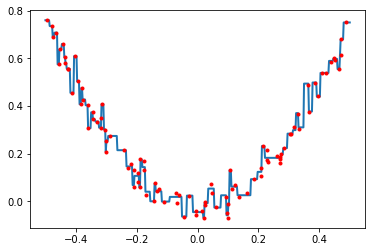

In [51]:

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)